In [32]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as mpcolors
import mnist
# from sklearn import neighbots

In [25]:
train_image_labels = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
train_images = idx2numpy.convert_from_file('train-images.idx3-ubyte')
test_image_labels = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')
test_images = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')

In [39]:
def plot_image(data, actual=None, predicted=None, ax=None):
    if ax == None:
#         ax = plt.gca()
    ax.imshow(data, cmap=plt.cm.binary)
    if actual != None:
        plt.annotate('Actual:' + str(actual), xy=(16,16), xytext=(26,1), 
                     horizontalalignment='right', verticalalignment='top')
    if predicted != None:
        plt.annotate('Predicted:' + str(predicted), xy=(16,16), xytext=(26,3), 
                     horizontalalignment='right', verticalalignment='top')

IndentationError: expected an indented block (<ipython-input-39-0fc4f48d17d2>, line 4)

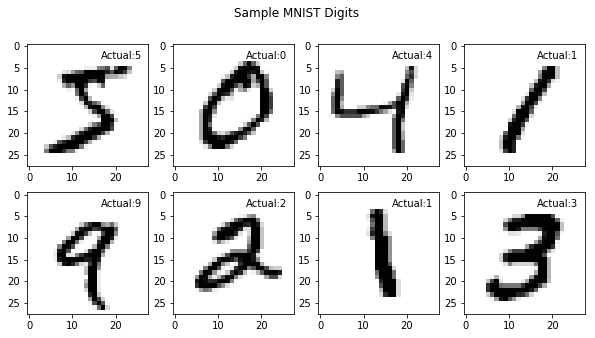

In [29]:
fig = plt.figure(figsize=(10,5))
for i in range (8):
    fig.add_subplot(2,4,i + 1)
    plot_image(train_images[i], train_image_labels[i])
fig.suptitle("Sample MNIST Digits")
plt.show()

In [34]:
from sklearn.neighbors import KNeighborsClassifier

flattened_train_images = train_images.reshape((train_images.shape[0], 
                                               train_images.shape[1]*train_images.shape[2]), 
                                              order='C')
# nn_clf = neighbors.KNeighborsClassifier(n_neighbors=1, algorithm='brute')
nn_clf = KNeighborsClassifier(n_neighbors=5)
nn_clf.fit(flattened_train_images, train_image_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

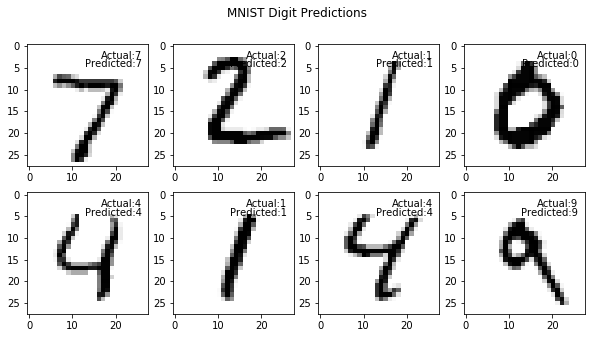

0.039000000000000035

In [36]:
flattened_test_images = test_images.reshape((test_images.shape[0], 
                                             test_images.shape[1]*test_images.shape[2]) ,
                                            order='C')
fig = plt.figure(figsize=(10,5))
for i in range (8):
    fig.add_subplot(2,4,i + 1)
    plot_image(test_images[i], test_image_labels[i], nn_clf.predict(flattened_test_images[i].reshape(1, -1))[0])
fig.suptitle("MNIST Digit Predictions")
plt.show()
1 - nn_clf.score(flattened_test_images[:1000], test_image_labels[:1000]) # error rate

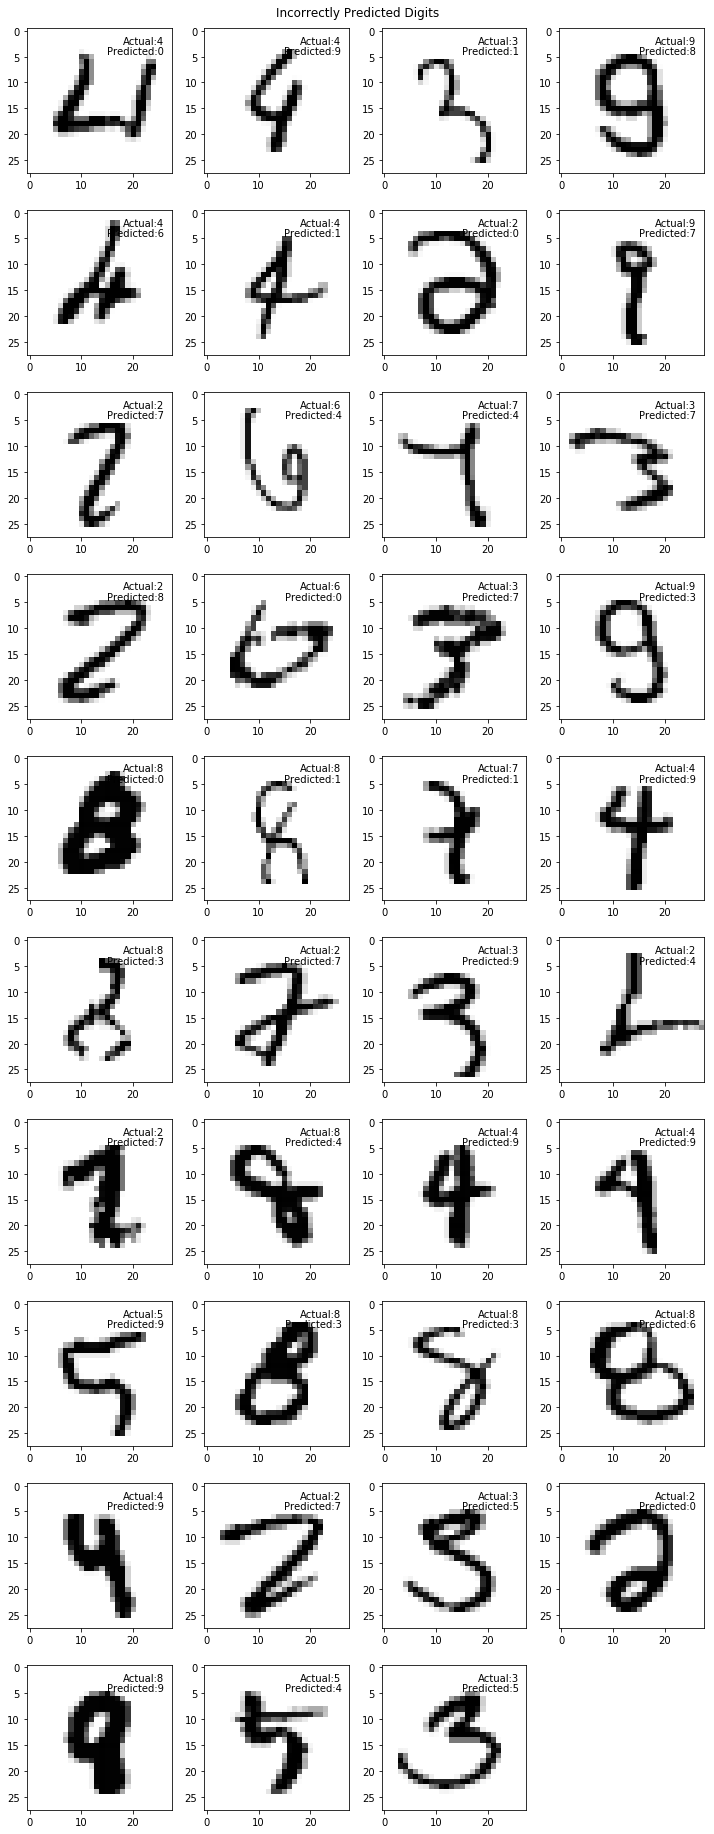

In [38]:
test_image_predictions = nn_clf.predict(flattened_test_images[:1000])
wrong_test_predictions_idx = np.arange(len(test_image_predictions))[test_image_predictions != test_image_labels[:1000]]
fig = plt.figure(figsize=(10,26))
fig.suptitle("Incorrectly Predicted Digits")
for i in range(len(wrong_test_predictions_idx)):
    idx = wrong_test_predictions_idx[i]
    fig.add_subplot((len(wrong_test_predictions_idx) + 3)//4, 4, i + 1)
    plot_image(test_images[idx], test_image_labels[idx], test_image_predictions[idx])
fig.suptitle("Incorrectly Predicted Digits")
fig.tight_layout()
fig.subplots_adjust(top=0.97)
plt.show()